<a href="https://colab.research.google.com/github/congltk1234/PythonStudy/blob/main/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
# Cần cài đặt Pillow: pip install pillow
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

In [28]:
from IPython.display import display
import sys
np.set_printoptions(suppress=True)

In [30]:
# Tạo 1 matrix random cấp 3x4
A = np.random.randint(10, size=(3, 4))
print(A)

[[8 5 8 6]
 [4 8 7 9]
 [2 3 7 2]]


In [38]:
# Phân tích thành phần suy biến với numpy:
# SVD: ứng dụng giảm số chiều của Image 
U, S, V = np.linalg.svd(A)
print(U)
print("-"*50)
print('Đây chỉ là vector gồm các giá trị khác 0 của S:\n',S)
print("-"*50)
print(V)

[[-0.6442874  -0.50411143 -0.57512208]
 [-0.67753887  0.7250443   0.12349838]
 [-0.35473204 -0.46923601  0.808692  ]]
--------------------------------------------------
Đây chỉ là vector gồm các giá trị khác 0 của S:
 [20.85426635  4.40310206  3.27296002]
--------------------------------------------------
[[-0.411135   -0.46541767 -0.5936529  -0.5117916 ]
 [-0.47039252  0.42517506 -0.50923949  0.58192112]
 [-0.76065676  0.16451548  0.58795584 -0.2205536 ]
 [-0.17635245 -0.75864828  0.20629909  0.59227804]]


In [34]:
# U nhân với Chuyển vị của U = Ma trận đơn vị
Ut = np.transpose(U)
print("-"*50)
print(U@Ut)

--------------------------------------------------
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


In [46]:
#KHÔI PHỤC MA TRẬN A:
# Tạo ma trận với các phần tử từ toàn số 0:
Sigma = np.zeros((3,4))
print(Sigma, '\n','-'*50)
# Thêm các giá trị của S vào ma trận 0 vừa tạo:
for i, x in enumerate(S):
  Sigma[i, i] = x # Inplace : thay đổi giá trị tại vị trí [i,j]
print(Sigma)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 
 --------------------------------------------------
[[20.85426635  0.          0.          0.        ]
 [ 0.          4.40310206  0.          0.        ]
 [ 0.          0.          3.27296002  0.        ]]


In [40]:
# Khôi phục lại ma trận A:
B = U@Sigma@V
print(B)
print(A-B)

[[8. 5. 8. 6.]
 [4. 8. 7. 9.]
 [2. 3. 7. 2.]]
[[ 0.  0. -0.  0.]
 [ 0. -0.  0. -0.]
 [ 0.  0.  0.  0.]]


In [41]:
#Tạo ma trận đường chéo, Khác với khôi phục ma trận A
Sigma = np.diag(S)
print(Sigma)
#Chỉ tạo ma trận 3x3, không thể nhân được

[[20.85426635  0.          0.        ]
 [ 0.          4.40310206  0.        ]
 [ 0.          0.          3.27296002]]


#**Ứng dụng SVD vào việc giảm số chiều của ảnh**

In [50]:
#Tải file từ trong máy lên Colab
from google.colab import files
uploaded = files.upload()

Saving example.jpg to example.jpg


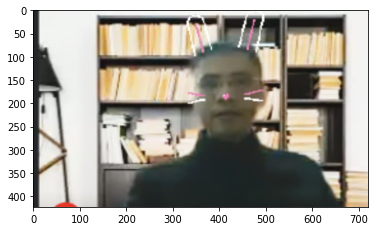

In [60]:
# Ứng dụng SVD vào giảm chiều của anh
# Đọc file ảnh từ đĩa cứng:
pic = Image.open('example.jpg')
#pic = Image.open()
plt.imshow(pic)

In [61]:
#convert to gray: Chuyển sang màu Gray:
pic = ImageOps.grayscale(pic)
#convert int pic to numpy array:
pic = np.array(pic)

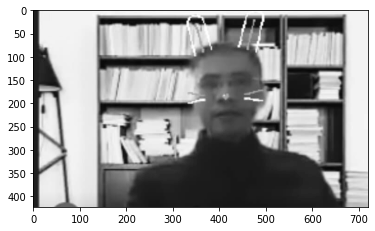

In [62]:
plt.imshow(pic, cmap = 'gray')

In [63]:
U, S, V = np.linalg.svd(pic)

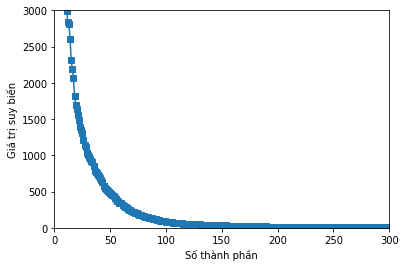

In [74]:
plt.plot(S, 's-')
plt.xlim([0,300])
plt.ylim([0,3000])
plt.xlabel('Số thành phần')
plt.ylabel('Giá trị suy biến')
plt.show()

In [75]:
comps = np.arange(0, 150)
#comp = np.arange(20, 100)
rec_pic = U[:,comps]@np.diag(S[comps])@V[comps,:]

<function matplotlib.pyplot.show>

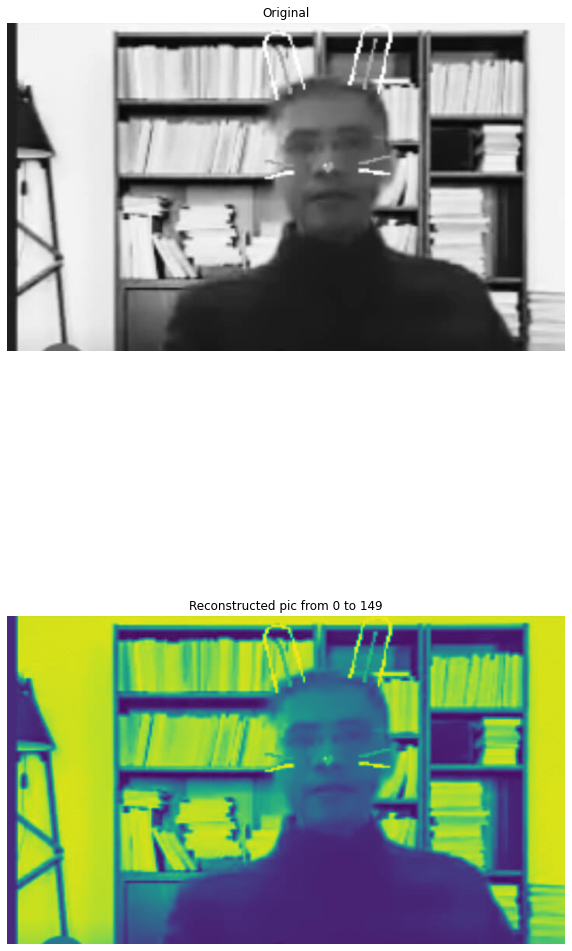

In [82]:
plt.figure(figsize=(10,20)) #Thay đổi kích thước
plt.subplot(1,2,1)
plt.imshow(pic, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rec_pic)
plt.title(f'Reconstructed pic from {comps[0]} to {comps[-1]}')
plt.axis('off')

plt.show